In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport as yp

# Dataset Salary 2024

In [2]:
df = pd.read_csv("Dataset_salary_2024.csv")

#### Vista general de DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


#### Estructura de nuestro Dataset

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


#### Verificación de valores únicos por columna

In [5]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

## Limpieza y transformación de Dataset

#### Identificación y borrado de Outliers

*Eliminando valores atípicos que pueden generar distorsiona en nuestro análisis*

In [6]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum()
outliers

np.int64(495)

In [7]:
mask = (z_scores < 3).all(axis=1)

df_jobs_salary = df[mask]

In [8]:
print(f"Original: {df.shape[0]} filas")
print(f"Sin outliers: {df_jobs_salary.shape[0]} filas")

Original: 16534 filas
Sin outliers: 16068 filas


#### Transformación de columnas

*Creando columna remote_type para expresar de forma mas clara la modalidad de trabajo*

In [9]:
def remote_category(ratio):
    if ratio == 0:
        return 'IN-PERSON'
    elif ratio == 50:
        return 'HYBRID'
    elif ratio == 100:
        return 'REMOTE'

df_jobs_salary = df_jobs_salary.drop(columns=['salary', 'salary_currency']).copy()
df_jobs_salary['remote_type'] = df_jobs_salary['remote_ratio'].apply(remote_category)

#### Valores de código en mayúsculas

In [10]:
df_jobs_salary["experience_level"] = df_jobs_salary["experience_level"].str.upper()
df_jobs_salary["employment_type"] = df_jobs_salary["employment_type"].str.upper()
df_jobs_salary["employee_residence"] = df_jobs_salary["employee_residence"].str.upper()
df_jobs_salary["company_location"] = df_jobs_salary["company_location"].str.upper()
df_jobs_salary["company_size"] = df_jobs_salary["company_size"].str.upper()

#### Columnas categóricas

In [11]:
df_jobs_salary['experience_level'] = df_jobs_salary['experience_level'].astype('category')
df_jobs_salary['employment_type'] = df_jobs_salary['employment_type'].astype('category')
df_jobs_salary['employee_residence'] = df_jobs_salary['employee_residence'].astype('category')
df_jobs_salary['company_location'] = df_jobs_salary['company_location'].astype('category')
df_jobs_salary['company_size'] = df_jobs_salary['company_size'].astype('category')

## DataFrame Data_salary_2024 limpio

In [12]:
df_jobs_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote_type
0,2024,SE,FT,AI Engineer,202730,US,0,US,M,IN-PERSON
1,2024,SE,FT,AI Engineer,92118,US,0,US,M,IN-PERSON
2,2024,SE,FT,Data Engineer,130500,US,0,US,M,IN-PERSON
3,2024,SE,FT,Data Engineer,96000,US,0,US,M,IN-PERSON
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M,IN-PERSON


In [13]:
df_jobs_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16068 entries, 0 to 16292
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           16068 non-null  int64   
 1   experience_level    16068 non-null  category
 2   employment_type     16068 non-null  category
 3   job_title           16068 non-null  object  
 4   salary_in_usd       16068 non-null  int64   
 5   employee_residence  16068 non-null  category
 6   remote_ratio        16068 non-null  int64   
 7   company_location    16068 non-null  category
 8   company_size        16068 non-null  category
 9   remote_type         16068 non-null  object  
dtypes: category(5), int64(3), object(2)
memory usage: 837.5+ KB


## Análisis exploratorio de datos

#### Análisis automatico de DataFrame

In [14]:
profile = yp(df_jobs_salary, title="Reporte EDA - Dataset_salary_2024", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 290.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Información general de DataFrame

In [15]:
df_jobs_salary.describe()

,work_year,salary_in_usd,remote_ratio
count,16068.000000,16068.000000,16068.000000
mean,2023.270911,148300.975728,31.376027
std,0.633091,61059.952373,46.173203
min,2022.000000,15000.000000,0.000000
25%,2023.000000,104000.000000,0.000000
50%,2023.000000,141525.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,355000.000000,100.000000


*La única variable a tomar en cuenta en este análisis es salary_in_usd debido a que las demás a pesar de ser numéricas no son sujetas a un análisis estadístico*

#### Análisis de variables categóricas

In [16]:
df_jobs_salary.describe(include=['category', 'object'])

,experience_level,employment_type,job_title,employee_residence,company_location,company_size,remote_type
count,16068,16068,16068,16068,16068,16068,16068
unique,4,4,147,80,70,3,3
top,SE,FT,Data Engineer,US,US,M,IN-PERSON
freq,10478,16006,3405,14225,14260,15100,10958


## Patrones y relaciones

#### Correlación de variables numéricas

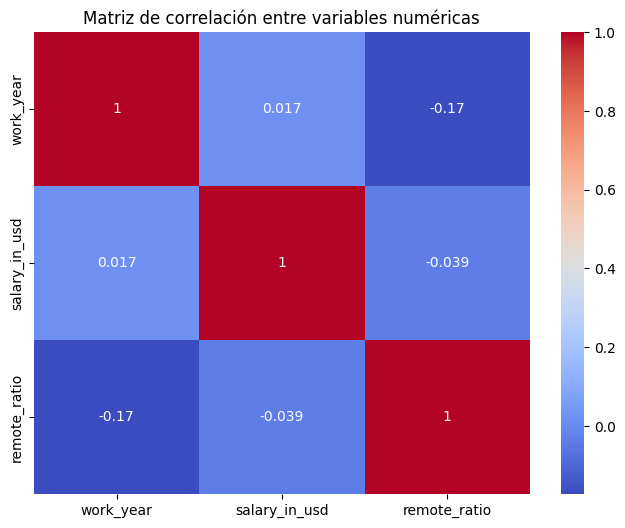

In [17]:
df_numeric = df_jobs_salary.select_dtypes(include='number')
cor = df_numeric.corr()

%matplotlib inline
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

#### Variables altamente correlacionadas

In [18]:
cor = df_numeric.corr().abs()
cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

work_year      remote_ratio     0.173058
salary_in_usd  remote_ratio     0.038697
work_year      salary_in_usd    0.016825
dtype: float64

*Solo se encuentra una variable numérica significativa por lo que el análisis correlacional no será importante ni significativo*

#### Distribución de salarios

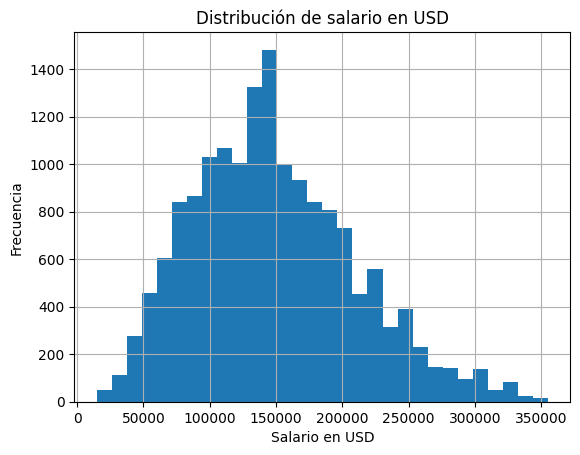

In [19]:
df_jobs_salary['salary_in_usd'].hist(bins=30)
plt.title('Distribución de salario en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.show()

#### Cantidad de empleados por nivel de experiencia

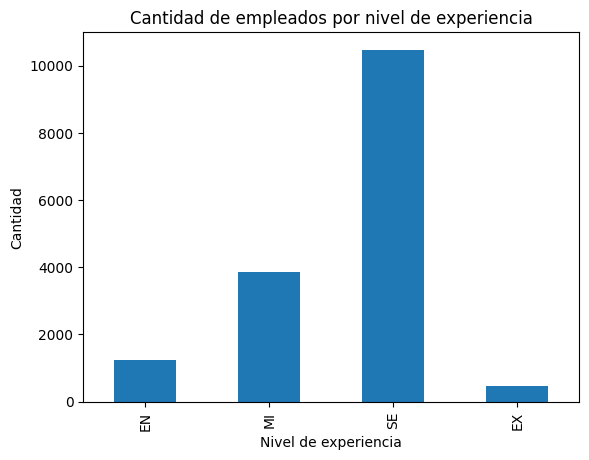

In [20]:
orden = ['EN', 'MI', 'SE', 'EX']

df_jobs_salary['experience_level'] = pd.Categorical(df_jobs_salary['experience_level'], categories=orden, ordered=True)

counts = df_jobs_salary['experience_level'].value_counts().sort_index()

counts.plot(kind='bar')
plt.title('Cantidad de empleados por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Cantidad')
plt.show()

#### Boxplot de salario por nivel de experiencia

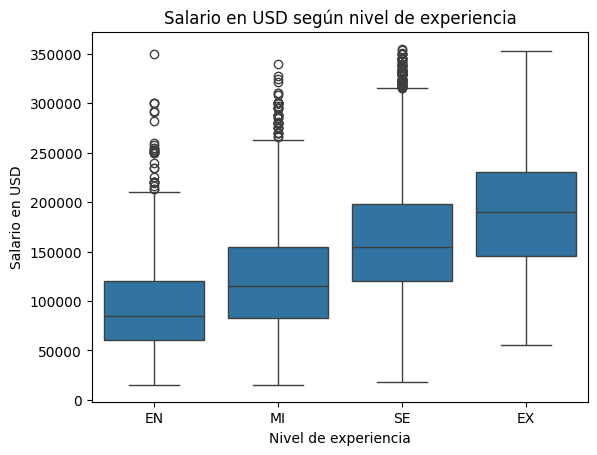

In [21]:
orden = ['EN', 'MI', 'SE', 'EX']
df_jobs_salary['experience_level'] = pd.Categorical(df_jobs_salary['experience_level'], categories=orden, ordered=True)

sns.boxplot(x='experience_level', y='salary_in_usd', data=df_jobs_salary)
plt.title('Salario en USD según nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.show()

#### Cantidad de empleados por tamaño de la empresa

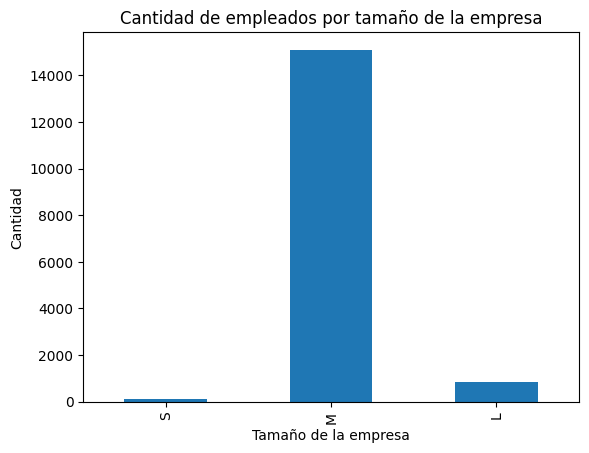

In [22]:
orden = ['S', 'M', 'L']

df_jobs_salary['company_size'] = pd.Categorical(df_jobs_salary['company_size'], categories=orden, ordered=True)

counts = df_jobs_salary['company_size'].value_counts().sort_index()

counts.plot(kind='bar')
plt.title('Cantidad de empleados por tamaño de la empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Cantidad')
plt.show()

#### Boxplot de salario por tamaño de empresa

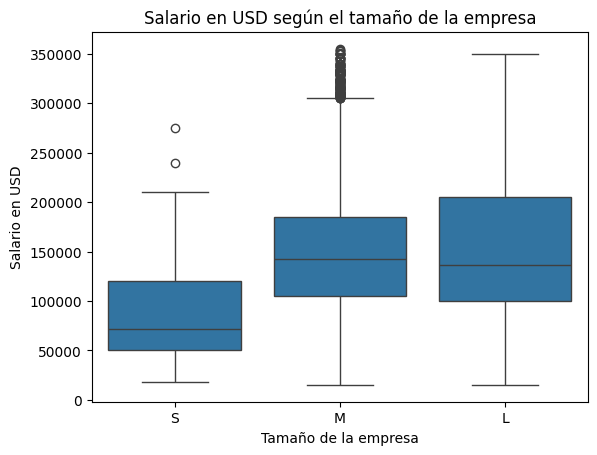

In [23]:
orden = ['S', 'M', 'L']
df_jobs_salary['company_size'] = pd.Categorical(df_jobs_salary['company_size'], categories=orden, ordered=True)

sns.boxplot(x='company_size', y='salary_in_usd', data=df_jobs_salary)
plt.title('Salario en USD según el tamaño de la empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario en USD')
plt.show()

#### Análisis top 10 trabajos mejor pagados

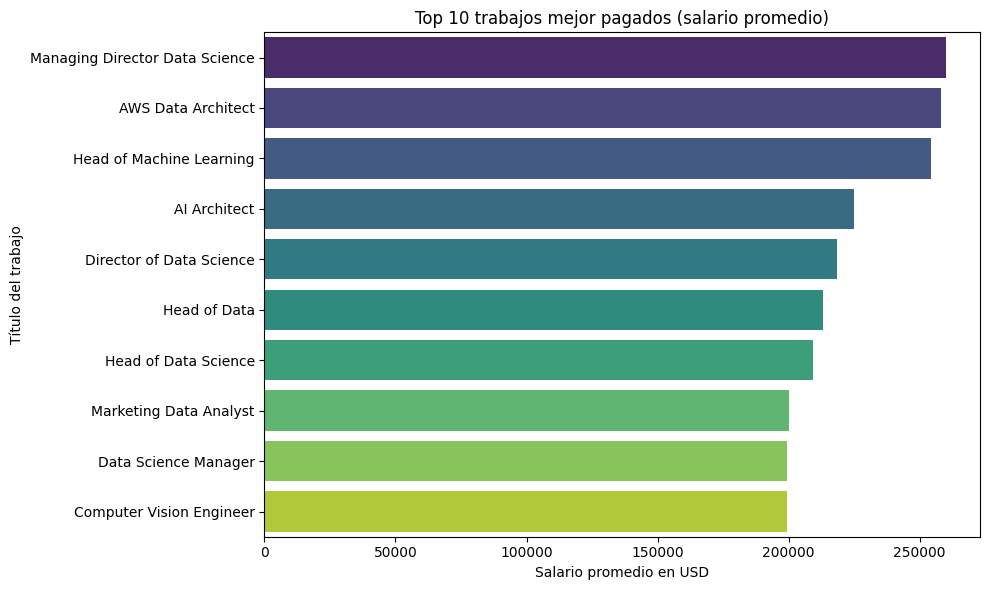

In [24]:
top_jobs_df = (
    df_jobs_salary.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_jobs_df.columns = ['job_title', 'avg_salary']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_jobs_df,
    x='avg_salary',
    y='job_title',
    hue='job_title',
    palette='viridis',
    legend=False
)

plt.title('Top 10 trabajos mejor pagados (salario promedio)')
plt.xlabel('Salario promedio en USD')
plt.ylabel('Título del trabajo')
plt.tight_layout()
plt.show()

#### Guardar Dataset transformado y limpio

In [25]:
df_jobs_salary.to_csv('Dataset_salary_2024_Limpio.csv', index=False)

## Resultados de análisis EDA

### Análisis de correlación

##### Nota sobre correlación de variables numéricas

> En este dataset, la mayoría de las variables son categóricas o cualitativas, y solo una variable numérica relevante (salario en USD) está presente. Por lo tanto, el análisis de correlación tradicional entre variables numéricas no es prioritario ni muy informativo en este caso.  En cambio, el enfoque se centró en el análisis y visualización de variables categóricas y su relación con el salario, que es la variable clave de interés.

### Distribución general de salarios

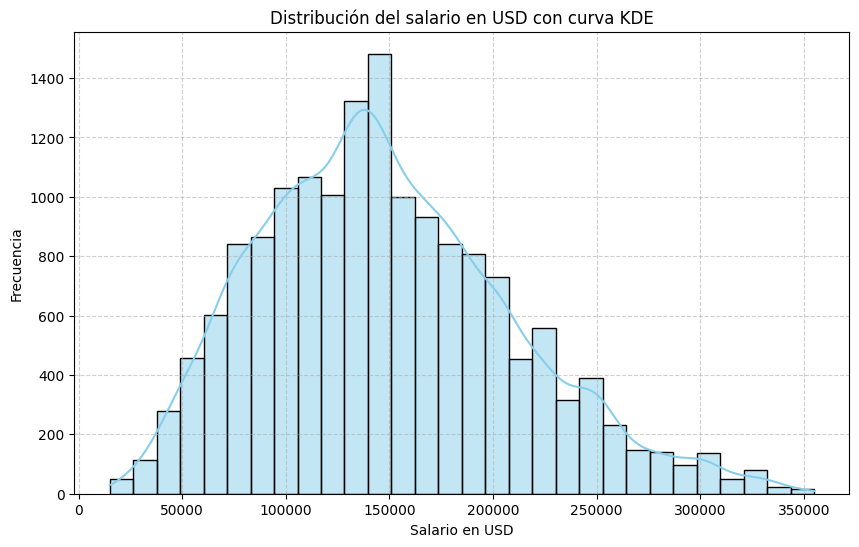

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df_jobs_salary['salary_in_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del salario en USD con curva KDE')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Conclusión de analisis de distribucion general de salarios

> La distribución general del salario en USD cuenta con un pico pronunciado aproximadamente entre los 130,000 y 150,000 USD al año, indicando que la mayoría de los empleados gana en ese rango. Hay algunos salarios muy altos que se alejan del grupo principal, aun asi, podríamos deducir que la mayoría de los salarios registrados esta al rededor de los 140,000 USD al año, siendo este el punto medio del pico anteriormente mencionado. Finalmente podemos ver que desde aproximadamente los 200,000 USD al año la población comienza a descender de forma pronunciada. 

### Análisis de salarios por nivel de experiencia

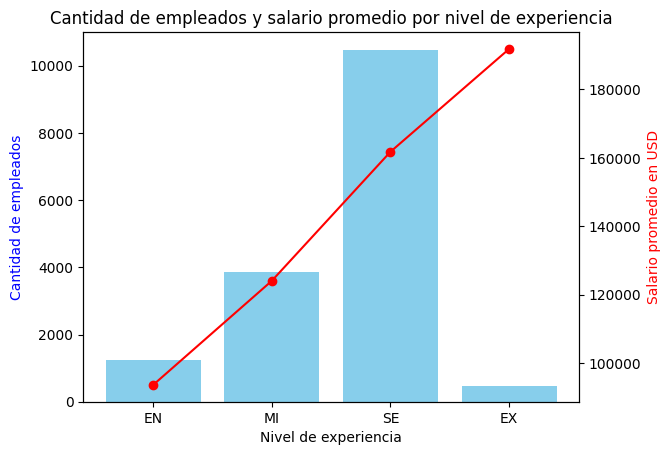

In [27]:
counts = df_jobs_salary['experience_level'].value_counts().loc[['EN', 'MI', 'SE', 'EX']]
means = df_jobs_salary.groupby('experience_level', observed=False)['salary_in_usd'].mean().loc[['EN', 'MI', 'SE', 'EX']]

fig, ax1 = plt.subplots()

ax1.bar(counts.index, counts.values, color='skyblue')
ax1.set_xlabel('Nivel de experiencia')
ax1.set_ylabel('Cantidad de empleados', color='blue')

ax2 = ax1.twinx()
ax2.plot(means.index, means.values, color='red', marker='o')
ax2.set_ylabel('Salario promedio en USD', color='red')

plt.title('Cantidad de empleados y salario promedio por nivel de experiencia')
plt.show()

##### Conclusión de análisis de población y salario promedio por nivel de experiencia
> La mayoría de los empleados se concentran en el nivel Senior (SE), seguido por niveles inferiores como Middle (MI) y Entry level (EN) y muy pocos en el nivel Executive (EX). Esto es típico, ya que los puestos más altos suelen ser menos numerosos.
> 
> Se observa una clara tendencia ascendente en el salario promedio conforme aumenta el nivel de experiencia. Los empleados en niveles Executive tienen un salario promedio significativamente más alto que los demás, lo que refleja la mayor responsabilidad y especialización requerida.

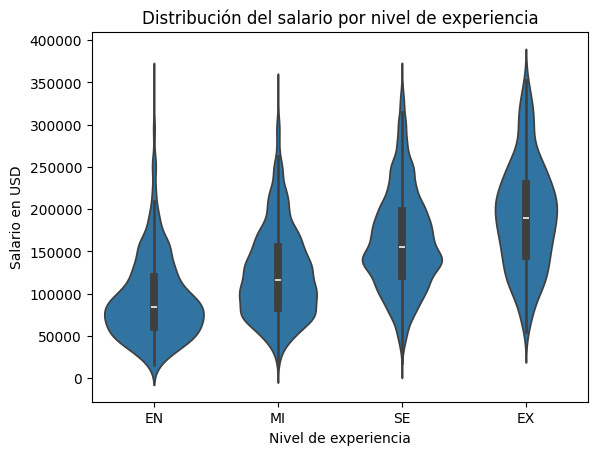

In [28]:
sns.violinplot(x='experience_level', y='salary_in_usd', data=df_jobs_salary, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Distribución del salario por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.show()

##### Conclusión de distribución de salario por nivel de experiencia
> En los niveles Entry (EN) y Middle (MI) se encuentra centrada en los salarios mas bajos, con una distribución un poco mas compacta en comparación a los dos niveles siguientes. El nivel Senior (SE) tiene una distribución un poco mas dispersa pero con una concentración mayor cercana a los 150,000 USD al año. Finalmente el nivel Executive (EX) tiene una dispersión mucho mas dispersa en comparación a sus antecesores.
> 
> Si bien la distribución del nivel Senior es cercana en un principio al nivel Executive podemos observar como la mayor concentración de salarios y el pico mas elevado del nivel Executive tiene a estar mas arriba que el nivel Senior como era de esperarse.
> 
> Para el nivel Executive, la muestra es mas pequeña pero se logra apreciar una concentración clara hacia salarios mas altos.

### Análisis de salario por tamaño de empresa

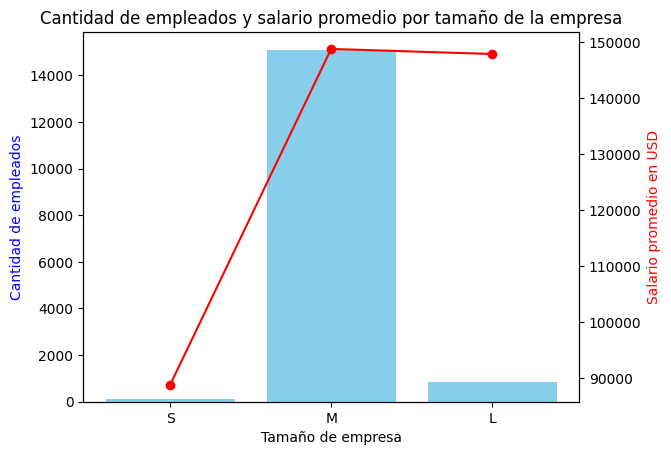

In [29]:
counts = df_jobs_salary['company_size'].value_counts().loc[['S', 'M', 'L']]
means = df_jobs_salary.groupby('company_size', observed=False)['salary_in_usd'].mean().loc[['S', 'M', 'L']]

fig, ax1 = plt.subplots()

ax1.bar(counts.index, counts.values, color='skyblue')
ax1.set_xlabel('Tamaño de empresa')
ax1.set_ylabel('Cantidad de empleados', color='blue')

ax2 = ax1.twinx()
ax2.plot(means.index, means.values, color='red', marker='o')
ax2.set_ylabel('Salario promedio en USD', color='red')

plt.title('Cantidad de empleados y salario promedio por tamaño de la empresa')
plt.show()

##### Conclusión de análisis de población y salario promedio por tamaño de la empresa

> La mayoría de la población estudiada se concentra en empresas de tamaño medianas (M), siendo incluso la población de las empresas tamaño grandes (L) solo un poco mayor a la población de las empresas de tamaño pequeñas (S)
> 
> El promedio de salarios para los empleados muestra una diferencia significativamente menor en las empresas pequeñas
> 
> Las empresas medianas y grandes realmente no muestran diferencia en los promedios salariales, incluso podemos visualizar como el promedio de los salarios de empresas medianas es mayor al promedio de los salarios de empresas grandes

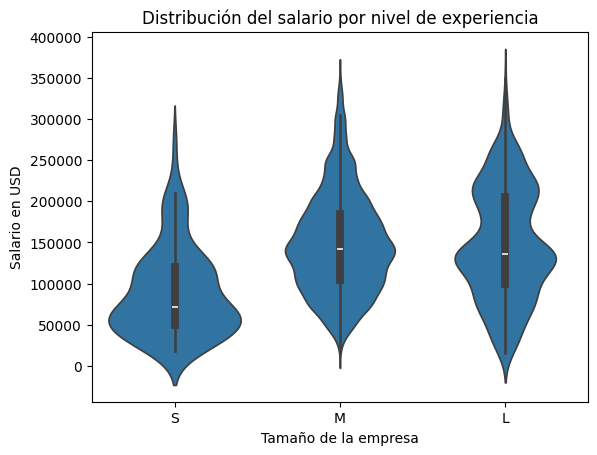

In [30]:
sns.violinplot(x='company_size', y='salary_in_usd', data=df_jobs_salary, order=['S', 'M', 'L'])
plt.title('Distribución del salario por nivel de experiencia')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario en USD')
plt.show()

##### Conclusión de análisis de distribución de salarios por tamaño de la empresa

> En este análisis podemos apreciar como en las empresas pequeñas (S) tenemos una distribución un poco mas compacta centrada aproximadamente en 50,000 USD al año, siendo que tambien las empresas pequeñas concentran su población en los rangos salariales mas bajos dentro del estudio.
> 
> Las empresas medianas (M) y grandes (L) tienen un rango de dispersión muy parecido (siendo la distribución de las empresas grandes mas dispersa que las medianas), aun asi es importante señalar que en las empresas medianas la mediana de los salarios parece estar un poco arriba que en la empresa grande y tener una mayor concentración en salarios.
> 
> Si bien en las empresas medianas el promedio o la media de rangos salariales tiene una mayor concentración, podemos ver con en las empresas grandes hay un segundo punto en el cual se concentra una buena cantidad de población, por lo que podemos deducir que el rango de salarios y población por estos mismos es mayor a la empresa mediana.

### Análisis top 10 trabajos mejor pagados

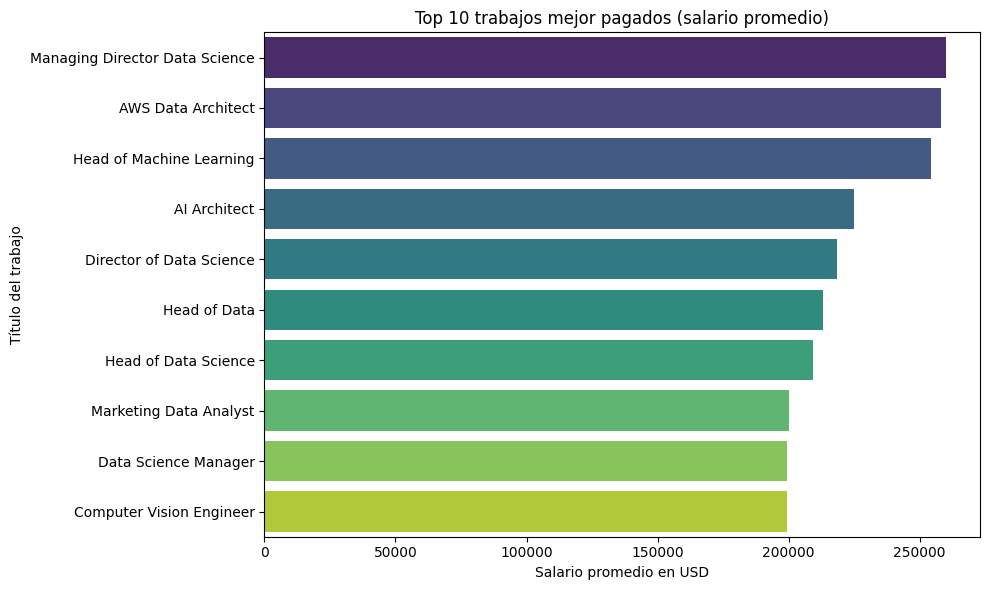

In [31]:
top_jobs_df = (
    df_jobs_salary.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_jobs_df.columns = ['job_title', 'avg_salary']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_jobs_df,
    x='avg_salary',
    y='job_title',
    hue='job_title',
    palette='viridis',
    legend=False
)

plt.title('Top 10 trabajos mejor pagados (salario promedio)')
plt.xlabel('Salario promedio en USD')
plt.ylabel('Título del trabajo')
plt.tight_layout()
plt.show()

##### Conclusión de análisis top 10 trabajos mejor pagados por salario promedio

> En este análisis podemos apreciar como el decimo trabajo mejor pagado es Computer Vision Engineer, el cual tiene un promedio de salarios de aproximadamente 250,000 USD al año. Luego de esto los promedios salariales ascienden a un rango de aproximadamente 250,000 USD al año

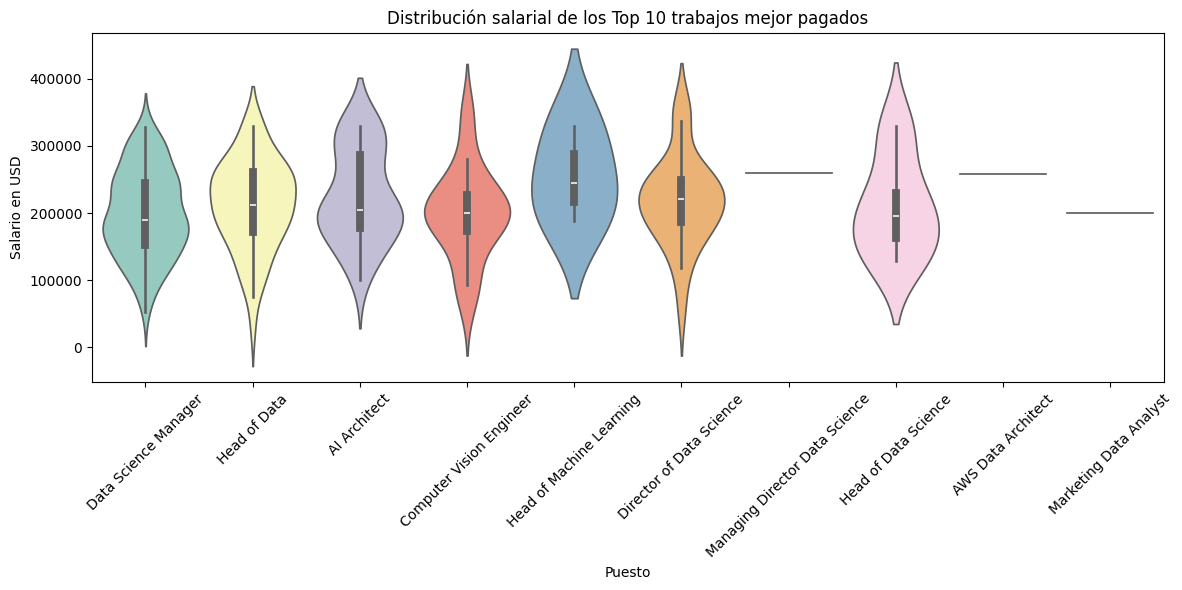

In [32]:
top_jobs = (
    df_jobs_salary.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_df = df_jobs_salary[df_jobs_salary['job_title'].isin(top_jobs)]

plt.figure(figsize=(12, 6))
sns.violinplot(
    data=top_df,
    x='job_title',
    y='salary_in_usd',
    hue='job_title',
    palette='Set3',
    legend=False
)
plt.title('Distribución salarial de los Top 10 trabajos mejor pagados')
plt.xlabel('Puesto')
plt.ylabel('Salario en USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusión de análisis distribución de top 10 trabajos mejor pagados

> Podemos ver que el salario con "mayor promedio" salarial del grafico anterior es difícil de analizar ya que cuenta con muy pocos registros, esto es lo que refleja un promedio mayor y en el caso de este grafico una mediana mayor al resto pero sin tanta población, al igual que el segundo trabajo mejor posicionado anteriormente.
> 
> Los demás trabajos tienen poblaciones muy marcadas, algunos con salarios muy distribuidos y otros dos con una distribución mas compacta en la mediana

## Conclusiones

-   **Distribución no uniforme no uniforme:**  
    - La distribución salarial no es pareja; hay una gran concentración de empleados con salarios dentro de un rango medio, mientras que los sueldos más altos son menos frecuentes.
    - Usar solo la media para analizar salarios podría ser engañoso. En este tipo de distribución, es útil también considerar la mediana para entender el salario "típico".
    - La variación se debe principalmente a los niveles de experiencia dentro de la población estudiada
-   **El nivel de experiencia es un factor determinante:**  
    - La población estudiada se concentra en el nivel de experiencia Senior (SE).
    - El nivel de experiencia Executive (EX) tiene una población muy pequeña pero un promedio de salarios significativamente mayor al de los demás niveles
    - La experiencia es un factor clave en el rango salarial de los empleos de TI, si bien hay trabajos los cuales con un nivel inferior se puede alcanzar un rango salarial mayor a otros trabajos con niveles de experiencia mayor por ser distintas naturalezas, el salario promedio asciende de forma muy pronunciada en base a este nivel de experiencia
-   **Efecto tamaño empresa en salarios:**  
    - Las empresas pequeñas, probablemente por menor capacidad financiera o estructura, ofrecen salarios más bajos en promedio.
    - Las empresas medianas y grandes pagan salarios promedio parecidos, lo que indica que al pasar a un tamaño mediano ya se alcanza un nivel salarial competitivo, que no se incrementa proporcionalmente con el tamaño mayor.
    - Para empleados, pasar de una empresa pequeña a una mediana puede significar un aumento salarial significativo, pero la diferencia entre medianas y grandes no es tan marcada en promedio.
-   **Trabajos mejor pagados**
    - En el análisis de los 10 trabajos mejor pagados, observamos que los puestos con los salarios más altos presentan muy pocos registros, lo que sugiere que esos valores pueden no ser representativos del mercado en general. Los demás trabajos tienen medianas salariales similares, pero varían en su dispersión, indicando que dentro de cada puesto hay diferencias importantes en salarios, probablemente relacionadas con experiencia, ubicación o tipo de empresa. Esto evidencia la importancia de analizar no solo el salario promedio sino también la distribución completa para comprender mejor el mercado laboral.
    - Si bien puestos como Managing Director Data Science y AWS Data Architect son los que alcanzan un pico mayor en cuenta a salario promedio, debemos tomar en cuenta que estos cuentan con muy pocos registros, por lo que dentro del estudio podríamos concluir que el trabajo mejor pagado es Head of Machine Learning, el cual a pesar de tener una mediana bastante alta y cercana a los primeros dos tambien cuenta con una población muy bien distribuida con un rango de salarios bastante amplio.